# EDA Zomato API Analysis


###  Data Exploration

In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)


In [3]:
# Load the dataset
zomato_df = pd.read_csv(r'zomato.csv', encoding='latin-1')


In [4]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
zomato_df.shape

(9551, 21)

In [6]:
zomato_df.columns.values

array(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'], dtype=object)

In [7]:
# Checking the data types of all the columns
zomato_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [8]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
# Checking the descriptive statistics of numeric variables
zomato_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Average Cost for Two: The standard deviation is high ( $16121.18), indicating significant variability in the cost.

Price Range: The price range for most restaurants falls within 1 to 2.

Aggregate Rating: The average aggregate rating for restaurants is around 2.67 and the minimum rating is 0, and the maximum is 4.9 whicch  indicates a diverse range of restaurant ratings.

Votes:The standard deviation is relatively high ( 430.17), suggesting a wide variation in the number of votes and the average number of votes received by restaurants is approximately 156.91.

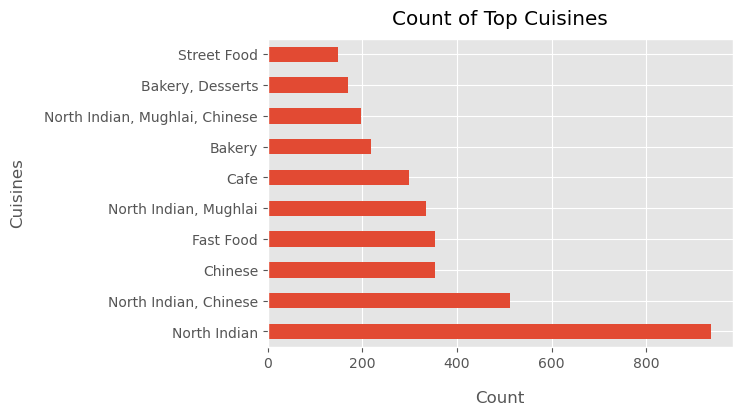

In [10]:
top_cuisines = zomato_df['Cuisines'].value_counts().head(10)
top_cuisines.plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Cuisines", labelpad=14)
plt.title("Count of Top Cuisines", y=1.02)
plt.show()



## Data Cleaning

In [23]:
# Create a copy of base data for manupulation & processing

zomato_df_u = zomato_df.copy()

In [24]:
zomato_df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
# check null values

zomato_df_u.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

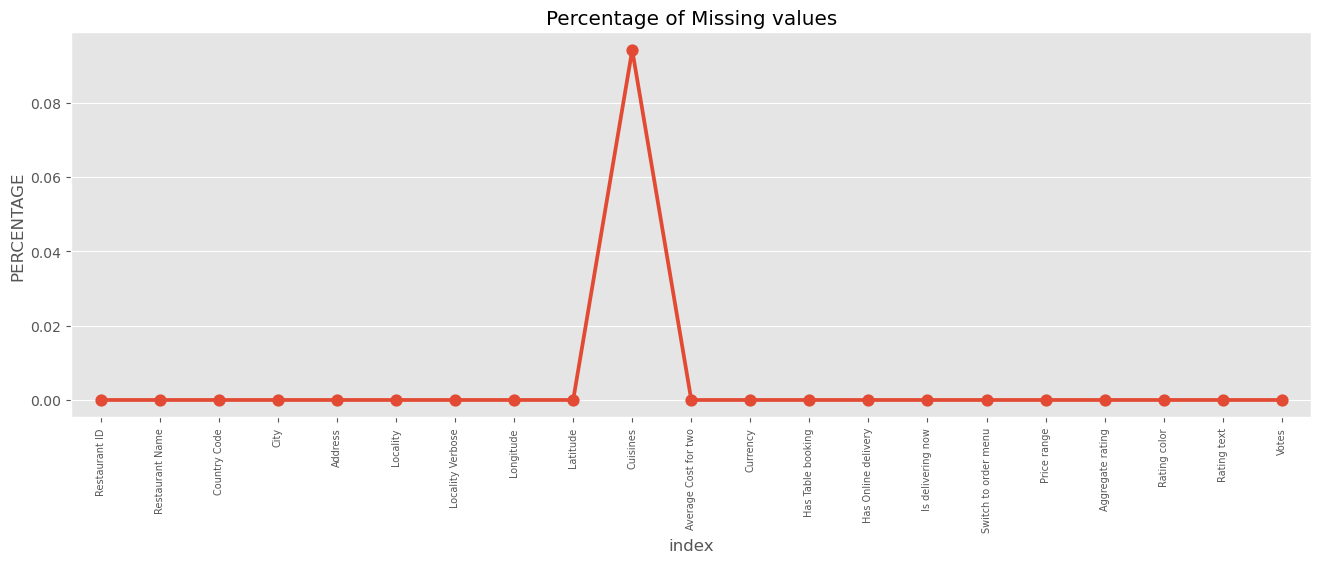

In [26]:
# check pecentage of missing data

missing = pd.DataFrame((zomato_df_u.isnull().sum()) * 100 / zomato_df_u.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [27]:
# Since the % of these records compared to total dataset is very low ie 0.09%, it is safe to ignore them.

zomato_df_u.dropna(how = 'any', inplace = True)

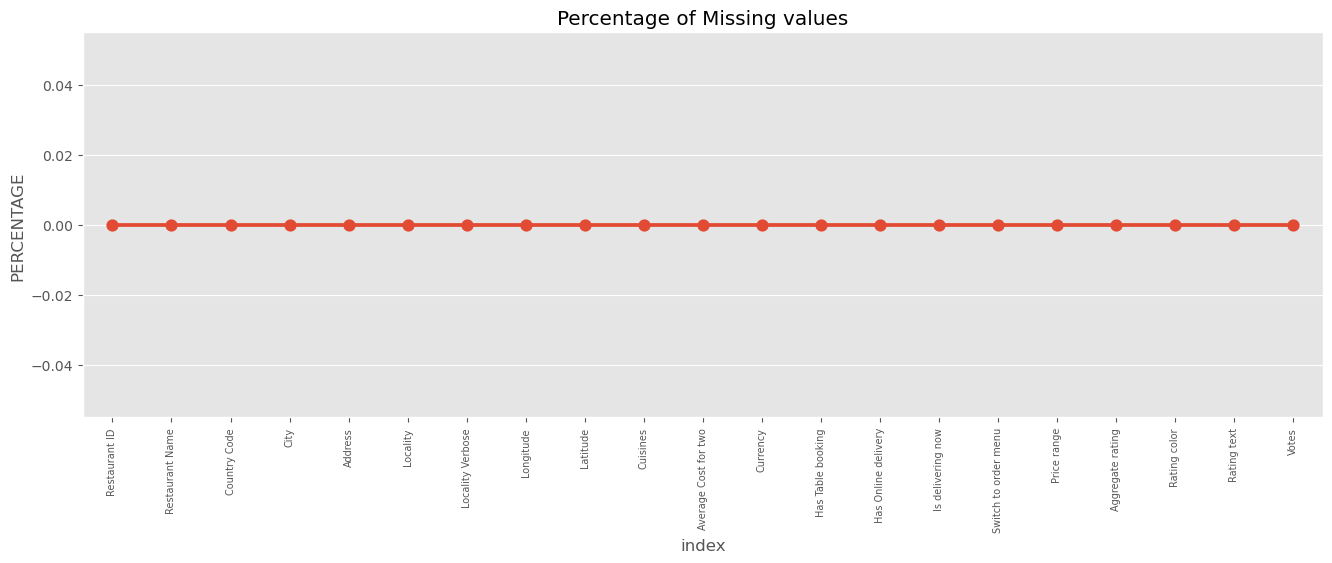

In [28]:
# confirm removal of null values

missing = pd.DataFrame((zomato_df_u.isnull().sum()) * 100 / zomato_df_u.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Remove columns not required for processing

In [29]:
zomato_df_u.columns.values

array(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'], dtype=object)

In [30]:
# check if there are duplicates
zomato_df_u.duplicated().sum()

0

In [31]:
zomato_df_u.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [39]:

zomato_df_u_2 = zomato_df_u.drop(['Restaurant ID','Restaurant Name','Currency','Longitude','Latitude',  'Country Code', 
                                  'Address', 'Locality Verbose','Switch to order menu', 'Price range', 
                            'Rating color', 'Rating text'], axis=1)

In [41]:
zomato_df_u_2.head()

,City,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,4.8,314
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,4.5,591
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4.4,270
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,4.9,365
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,4.8,229


In [62]:
# Renaming the columns
zomato_df_u_3 = zomato_df_u_2.rename(columns = {"Average Cost for two":"AVG Cost_2", "Has Table booking": "Table booking",
                                                "Has Online delivery":"Online delivery","Is delivering now": "Delivering now",
                                                "Aggregate rating": "AVG rating"})

In [63]:
zomato_df_u_3.head()

,City,Locality,Cuisines,AVG Cost_2,Table booking,Online delivery,Delivering now,AVG rating,Votes
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,4.8,314
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,4.5,591
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4.4,270
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,4.9,365
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,4.8,229


## Data Analysis & Visualization.

#### Detecting  outliers

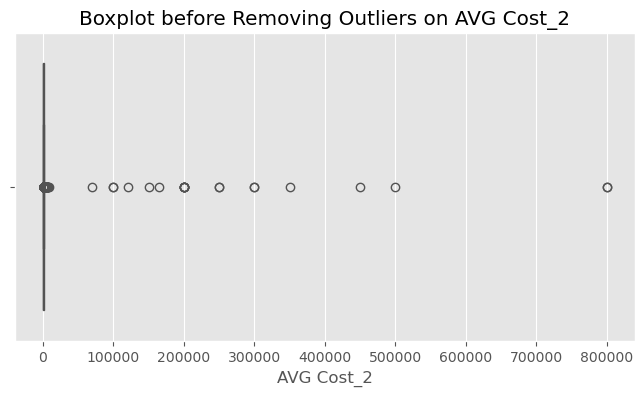

In [77]:

# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_3['AVG Cost_2'])
plt.title('Boxplot before Removing Outliers on AVG Cost_2')
plt.show()

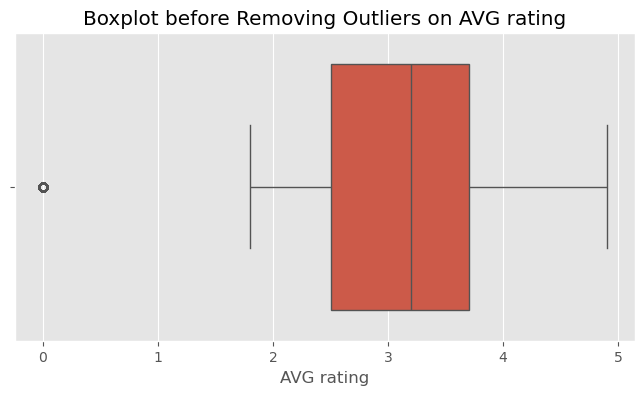

In [79]:

# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_3['AVG rating'])
plt.title('Boxplot before Removing Outliers on AVG rating')
plt.show()

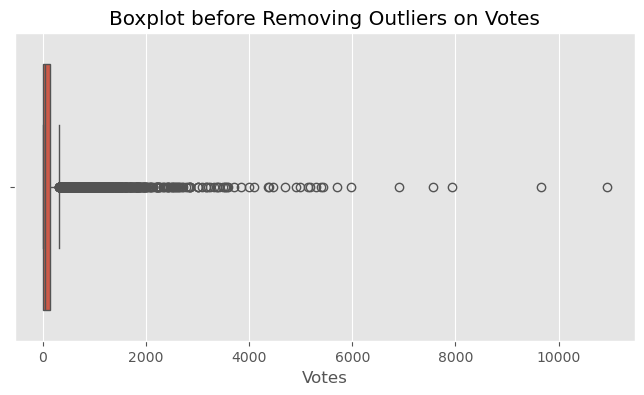

In [78]:

# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_3['Votes'])
plt.title('Boxplot before Removing Outliers on Votes')
plt.show()

In [82]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(data, k=1.5):
    # Calculate quartiles using numpy
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR

    # Filter the data to remove outliers
    filtered_data = data[(data >= lower_fence) & (data <= upper_fence)]
    
    return pd.Series(filtered_data)

In [89]:
# Create a copy of the DataFrame
zomato_df_u_4 = zomato_df_u_3.copy()

# Assuming df_cars_u is your DataFrame
zomato_df_u_4['AVG Cost_2_u'] = remove_outliers(zomato_df_u_4['AVG Cost_2'])
zomato_df_u_4['Votes_u'] = remove_outliers(zomato_df_u_4['Votes'])

In [90]:
# Imputeing NAN with Mean:


zomato_df_u_4['AVG Cost_2_u'].fillna(zomato_df_u_4['AVG Cost_2_u'].mean(), inplace=True)
zomato_df_u_4['Votes_u'].fillna(zomato_df_u_4['Votes_u'].mean(), inplace=True)


In [93]:
pd.set_option("display.float_format", lambda x: "%.2f" %x)

In [94]:
zomato_df_u_4.head()

,City,Locality,Cuisines,AVG Cost_2,Table booking,Online delivery,Delivering now,AVG rating,Votes,AVG Cost_2_u,Votes_u
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,4.80,314,1100.00,314.00
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,4.50,591,1200.00,54.51
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4.40,270,438.29,270.00
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,4.90,365,438.29,54.51
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,4.80,229,438.29,229.00


In [ ]:
# 1.Number of restaurants in each location?

# Assuming your dataframe is named zomato_df
# If 'City' column doesn't exist, replace it with 'Locality' or the appropriate column name

# Use value_counts() to count the number of restaurants in each city
restaurant_count_by_city = zomato_df['City'].value_counts()

# Display the result or plot a bar chart
restaurant_count_by_city.plot(kind='bar', figsize=(12, 6))
plt.xlabel('City', labelpad=14)
plt.ylabel('Number of Restaurants', labelpad=14)
plt.title('Number of Restaurants in Each City', y=1.02)
plt.show()